In [1]:
import yfinance as yf # yfinance API for daily stock market prices

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

C:\Users\risha\AppData\Local\Programs\Python\Python39\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
stock_name = input("Benchmark Index:") # specify the stock index here ("^GSPC", "^NSEI", "^BSESN")

try:
    stock = yf.Ticker(stock_name)
except:
    print("No Such Index Found")

Benchmark Index:^BSESN


In [3]:
stock = stock.history(period="max")
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-07-01 00:00:00+05:30,4263.109863,4301.770020,4247.660156,4300.859863,0,0.0,0.0
1997-07-02 00:00:00+05:30,4302.959961,4395.310059,4295.399902,4333.899902,0,0.0,0.0
1997-07-03 00:00:00+05:30,4335.790039,4393.290039,4299.970215,4323.459961,0,0.0,0.0
1997-07-04 00:00:00+05:30,4332.700195,4347.589844,4300.580078,4323.819824,0,0.0,0.0
1997-07-07 00:00:00+05:30,4326.810059,4391.009766,4289.490234,4291.450195,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-30 00:00:00+05:30,72000.203125,72142.226562,71075.718750,71139.898438,12900,0.0,0.0
2024-01-31 00:00:00+05:30,71073.039062,71851.390625,70846.039062,71752.109375,11000,0.0,0.0
2024-02-01 00:00:00+05:30,71998.781250,72151.023438,71574.890625,71645.296875,11500,0.0,0.0


In [4]:
stock.index

DatetimeIndex(['1997-07-01 00:00:00+05:30', '1997-07-02 00:00:00+05:30',
               '1997-07-03 00:00:00+05:30', '1997-07-04 00:00:00+05:30',
               '1997-07-07 00:00:00+05:30', '1997-07-08 00:00:00+05:30',
               '1997-07-09 00:00:00+05:30', '1997-07-10 00:00:00+05:30',
               '1997-07-11 00:00:00+05:30', '1997-07-14 00:00:00+05:30',
               ...
               '2024-01-19 00:00:00+05:30', '2024-01-23 00:00:00+05:30',
               '2024-01-24 00:00:00+05:30', '2024-01-25 00:00:00+05:30',
               '2024-01-29 00:00:00+05:30', '2024-01-30 00:00:00+05:30',
               '2024-01-31 00:00:00+05:30', '2024-02-01 00:00:00+05:30',
               '2024-02-02 00:00:00+05:30', '2024-02-05 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=6552, freq=None)

<AxesSubplot:xlabel='Date'>

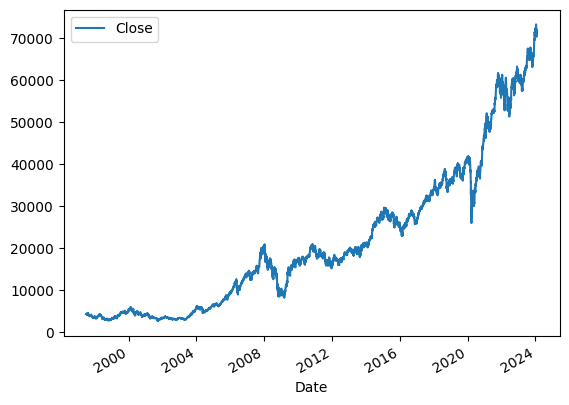

In [5]:
stock.plot.line(y="Close", use_index=True)

In [6]:
del stock["Dividends"]
del stock["Stock Splits"]

In [7]:
stock["Tomorrow"] = stock["Close"].shift(-1)
stock

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1997-07-01 00:00:00+05:30,4263.109863,4301.770020,4247.660156,4300.859863,0,4333.899902
1997-07-02 00:00:00+05:30,4302.959961,4395.310059,4295.399902,4333.899902,0,4323.459961
1997-07-03 00:00:00+05:30,4335.790039,4393.290039,4299.970215,4323.459961,0,4323.819824
1997-07-04 00:00:00+05:30,4332.700195,4347.589844,4300.580078,4323.819824,0,4291.450195
1997-07-07 00:00:00+05:30,4326.810059,4391.009766,4289.490234,4291.450195,0,4306.390137
...,...,...,...,...,...,...
2024-01-30 00:00:00+05:30,72000.203125,72142.226562,71075.718750,71139.898438,12900,71752.109375
2024-01-31 00:00:00+05:30,71073.039062,71851.390625,70846.039062,71752.109375,11000,71645.296875
2024-02-01 00:00:00+05:30,71998.781250,72151.023438,71574.890625,71645.296875,11500,72085.632812


In [8]:
stock["Target"] = (stock["Tomorrow"] > stock["Close"]).astype(int)
stock

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1997-07-01 00:00:00+05:30,4263.109863,4301.770020,4247.660156,4300.859863,0,4333.899902,1
1997-07-02 00:00:00+05:30,4302.959961,4395.310059,4295.399902,4333.899902,0,4323.459961,0
1997-07-03 00:00:00+05:30,4335.790039,4393.290039,4299.970215,4323.459961,0,4323.819824,1
1997-07-04 00:00:00+05:30,4332.700195,4347.589844,4300.580078,4323.819824,0,4291.450195,0
1997-07-07 00:00:00+05:30,4326.810059,4391.009766,4289.490234,4291.450195,0,4306.390137,1
...,...,...,...,...,...,...,...
2024-01-30 00:00:00+05:30,72000.203125,72142.226562,71075.718750,71139.898438,12900,71752.109375,1
2024-01-31 00:00:00+05:30,71073.039062,71851.390625,70846.039062,71752.109375,11000,71645.296875,0
2024-02-01 00:00:00+05:30,71998.781250,72151.023438,71574.890625,71645.296875,11500,72085.632812,1


In [9]:
stock = stock.loc["1990-01-01":].copy()
stock

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1997-07-01 00:00:00+05:30,4263.109863,4301.770020,4247.660156,4300.859863,0,4333.899902,1
1997-07-02 00:00:00+05:30,4302.959961,4395.310059,4295.399902,4333.899902,0,4323.459961,0
1997-07-03 00:00:00+05:30,4335.790039,4393.290039,4299.970215,4323.459961,0,4323.819824,1
1997-07-04 00:00:00+05:30,4332.700195,4347.589844,4300.580078,4323.819824,0,4291.450195,0
1997-07-07 00:00:00+05:30,4326.810059,4391.009766,4289.490234,4291.450195,0,4306.390137,1
...,...,...,...,...,...,...,...
2024-01-30 00:00:00+05:30,72000.203125,72142.226562,71075.718750,71139.898438,12900,71752.109375,1
2024-01-31 00:00:00+05:30,71073.039062,71851.390625,70846.039062,71752.109375,11000,71645.296875,0
2024-02-01 00:00:00+05:30,71998.781250,72151.023438,71574.890625,71645.296875,11500,72085.632812,1


In [10]:
def predict(train, test, predictors, model, surety = 0.6):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds[preds >= surety] = 1
    preds[preds < surety] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [11]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0 : i].copy()
        test = data.iloc[i : (i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [12]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = stock.rolling(horizon).mean()
    ratio_column = f"Close Ratio - {horizon}"
    stock[ratio_column] = stock["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend - {horizon}"
    stock[trend_column] = stock.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]
    
stock

,Open,High,Low,Close,Volume,Tomorrow,Target,Close Ratio - 2,Trend - 2,Close Ratio - 5,Trend - 5,Close Ratio - 60,Trend - 60,Close Ratio - 250,Trend - 250,Close Ratio - 1000,Trend - 1000
Date,,,,,,,,,,,,,,,,,
1997-07-01 00:00:00+05:30,4263.109863,4301.770020,4247.660156,4300.859863,0,4333.899902,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-02 00:00:00+05:30,4302.959961,4395.310059,4295.399902,4333.899902,0,4323.459961,0,1.003826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-03 00:00:00+05:30,4335.790039,4393.290039,4299.970215,4323.459961,0,4323.819824,1,0.998794,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-04 00:00:00+05:30,4332.700195,4347.589844,4300.580078,4323.819824,0,4291.450195,0,1.000042,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-07 00:00:00+05:30,4326.810059,4391.009766,4289.490234,4291.450195,0,4306.390137,1,0.996243,1.0,0.994612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-30 00:00:00+05:30,72000.203125,72142.226562,71075.718750,71139.898438,12900,71752.109375,1,0.994397,1.0,1.001370,2.0,1.030170,38.0,1.104196,146.0,1.324656,548.0
2024-01-31 00:00:00+05:30,71073.039062,71851.390625,70846.039062,71752.109375,11000,71645.296875,0,1.004284,1.0,1.006074,3.0,1.037064,39.0,1.112929,147.0,1.335315,548.0
2024-02-01 00:00:00+05:30,71998.781250,72151.023438,71574.890625,71645.296875,11500,72085.632812,1,0.999255,1.0,1.002931,2.0,1.033515,39.0,1.110535,146.0,1.332588,548.0


In [13]:
stock = stock.dropna()
stock

,Open,High,Low,Close,Volume,Tomorrow,Target,Close Ratio - 2,Trend - 2,Close Ratio - 5,Trend - 5,Close Ratio - 60,Trend - 60,Close Ratio - 250,Trend - 250,Close Ratio - 1000,Trend - 1000
Date,,,,,,,,,,,,,,,,,
2001-07-20 00:00:00+05:30,3375.820068,3389.489990,3331.419922,3340.750000,0,3330.979980,0,0.995503,0.0,0.984784,0.0,0.958136,27.0,0.852056,130.0,0.837352,512.0
2001-07-23 00:00:00+05:30,3340.889893,3340.889893,3310.949951,3330.979980,0,3335.080078,1,0.998536,0.0,0.987952,0.0,0.955753,27.0,0.850547,130.0,0.835113,511.0
2001-07-24 00:00:00+05:30,3326.840088,3340.909912,3306.169922,3335.080078,0,3301.969971,0,1.000615,1.0,0.994884,1.0,0.957773,27.0,0.852337,131.0,0.836348,512.0
2001-07-25 00:00:00+05:30,3307.159912,3338.219971,3296.429932,3301.969971,0,3259.030029,0,0.995011,1.0,0.989816,1.0,0.949338,26.0,0.844768,130.0,0.828258,511.0
2001-07-26 00:00:00+05:30,3298.639893,3318.600098,3254.280029,3259.030029,0,3251.530029,0,0.993455,0.0,0.983543,1.0,0.938051,26.0,0.834579,130.0,0.817698,511.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29 00:00:00+05:30,70968.101562,72010.218750,70880.539062,71941.570312,13900,71139.898438,0,1.008699,1.0,1.011107,3.0,1.043549,39.0,1.117352,146.0,1.340314,549.0
2024-01-30 00:00:00+05:30,72000.203125,72142.226562,71075.718750,71139.898438,12900,71752.109375,1,0.994397,1.0,1.001370,2.0,1.030170,38.0,1.104196,146.0,1.324656,548.0
2024-01-31 00:00:00+05:30,71073.039062,71851.390625,70846.039062,71752.109375,11000,71645.296875,0,1.004284,1.0,1.006074,3.0,1.037064,39.0,1.112929,147.0,1.335315,548.0


In [14]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

predictions = backtest(stock, model, new_predictors)

In [15]:
predictions["Predictions"].value_counts()

0.0    2710
1.0     341
Name: Predictions, dtype: int64

In [16]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.53589
0    0.46411
Name: Target, dtype: float64

In [17]:
precision_score(predictions["Target"], predictions["Predictions"])

0.6217008797653959

In [18]:
invest = predictions.iloc[-1]["Predictions"]
if invest == 1:
    print("You Should Invest Today")
else:
    print("You Should Not Invest Today")

You Should Not Invest Today
